In [87]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [96]:
trunc = "S";

In [97]:
plt.rcParams["font.family"] = "serif"           
plt.rcParams["mathtext.fontset"] = "dejavuserif"
                                                    
# NOTE the plots will be in one Figure          
plt.rcParams.update({'font.size': 25})    
resolution = 150

In [98]:
enuc = np.load('enucs.npy')
bonds = np.load('bonds.npy')

In [99]:
sols = []
dirs = os.listdir('CC' + trunc + 'sols')
dirs.sort()

for filename in dirs:
    if filename.endswith(".npy"):
        sol = np.load('CC' + trunc + 'sols/' + filename)
        # Removing solutions with large complex contributions
        sol = [np.real(val[0]) for val in sol if np.abs(np.imag(val[0])) < 1e-6]
        sols.append(sol)

In [100]:
eigenvalues = []

eig_dirs = os.listdir('eigen')
eig_dirs.sort()

for filename in eig_dirs:
    if filename.endswith(".npy"):
        eigenvalues.append(np.load('eigen/' + filename))
        
eigenvalues = np.transpose(np.array([list(np.sort(eig)) for eig in eigenvalues]))

In [101]:
eigenvalues_unique = []
for i in range(eigenvalues.shape[1]):
    states = eigenvalues[:,i]
    ns = len(states)
    values = np.unique([np.round(eigenval,6) for eigenval in states])
    print(np.unique([np.round(eigenval,6) for eigenval in states], return_counts = True)[1])
    eigenvalues_unique.append(values)

eigenvalues_unique = np.transpose(np.array(eigenvalues_unique))

[1 1 2 1 1 2 2 1 1 2 1]
[1 1 2 1 1 2 2 1 1 2 1]
[1 1 2 1 1 2 2 1 1 2 1]
[1 1 2 1 1 2 2 1 1 2 1]
[1 1 2 1 1 2 2 1 1 2 1]
[1 1 2 1 1 2 2 1 1 2 1]
[1 1 2 1 1 2 2 1 1 2 1]
[1 1 2 1 1 2 2 1 1 2 1]
[1 1 2 1 1 2 2 1 2 1 1]
[1 1 2 1 1 2 2 1 2 1 1]
[1 1 2 1 1 2 2 1 2 1 1]
[1 1 2 1 1 2 2 1 2 1 1]
[1 1 2 1 1 2 2 1 2 1 1]
[1 1 2 1 1 2 2 1 2 1 1]
[1 1 2 1 1 2 2 1 2 1 1]
[1 1 2 1 1 2 2 1 2 1 1]
[1 1 2 1 1 2 2 1 2 1 1]
[1 1 2 1 1 2 2 1 2 1 1]
[1 1 2 1 1 2 2 1 2 1 1]
[1 1 2 1 1 2 2 1 2 1 1]
[1 1 2 1 1 2 2 1 2 1 1]
[1 1 2 1 1 2 2 1 2 1 1]
[1 1 2 1 1 2 2 1 2 1 1]
[1 1 2 1 2 1 2 1 2 1 1]
[1 1 2 1 2 1 2 1 2 1 1]
[1 1 2 1 2 1 2 1 2 1 1]
[1 1 2 1 2 1 2 1 2 1 1]
[1 1 2 1 2 1 2 1 2 1 1]
[1 1 2 1 2 2 1 1 2 1 1]
[1 1 2 1 2 2 1 1 2 1 1]
[1 1 2 1 2 2 1 1 2 1 1]
[1 1 2 1 2 2 1 1 2 1 1]
[1 1 2 1 2 2 1 1 2 1 1]
[1 1 2 1 2 2 1 1 2 1 1]
[1 1 2 1 2 2 1 1 2 1 1]
[1 1 2 1 2 2 1 1 2 1 1]
[1 1 2 1 2 2 1 1 2 1 1]
[1 1 2 1 2 2 1 1 2 1 1]
[1 1 2 1 2 2 1 1 2 1 1]
[1 1 2 1 2 2 1 1 2 1 1]
[1 1 2 1 2 2 1 1 2 1 1]
[1 1 2 1 2 2 1 1

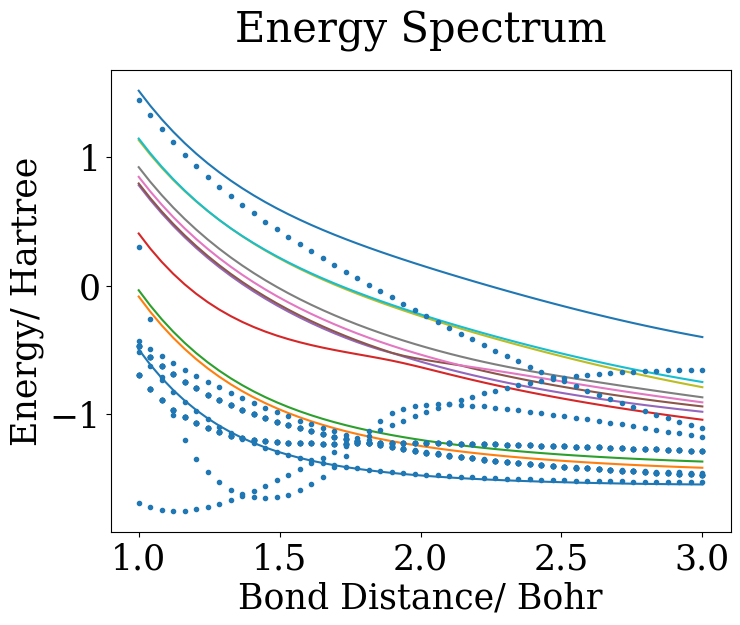

In [102]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))

for state in eigenvalues_unique:
    ax1.plot(bonds, state + enuc)

for (i,sol) in enumerate(sols):
    ax1.plot(bonds[i] * np.ones_like(sol), sol + enuc[i], '.', color="tab:blue")

ax1.set_xlabel('Bond Distance/ Bohr') 
ax1.set_ylabel('Energy/ Hartree')            
ax1.set_title('Energy Spectrum', pad=20)    

fig.savefig("LiH210CC" + trunc + "_Full.png",
             bbox_inches="tight",                                       
             dpi= resolution,                                           
             transparent= True,                                         
             facecolor= 'w',                                            
             edgecolor= 'w',                                            
             orientation ='landscape') 

plt.show()

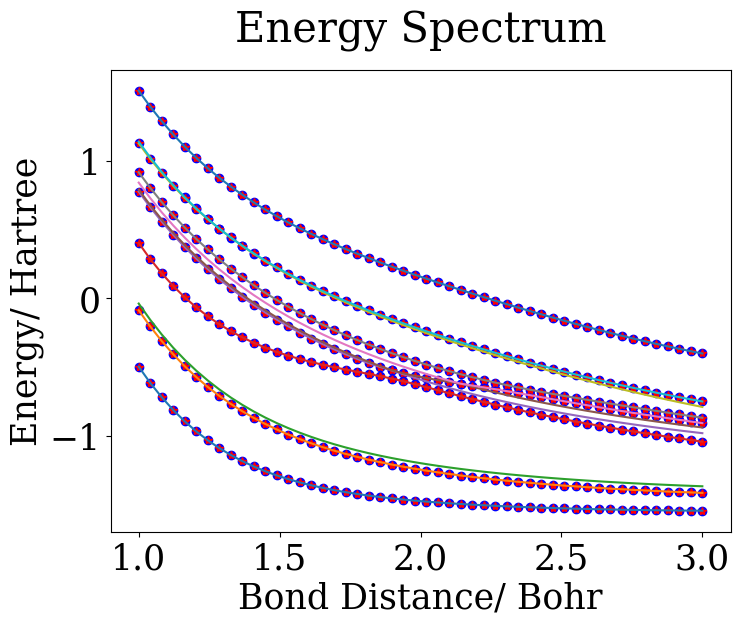

In [86]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))

for i in range(len(sols)):
    for k, state in enumerate(eigenvalues_unique[:,i]):
        diff_vec = list(np.abs(sols[i]-state))
        diff_idx = diff_vec.index(min(diff_vec))
        
        if diff_vec[diff_idx] < 5e-3:
            ax1.plot(bonds[i], state + enuc[i], 'bo')
            ax1.plot(bonds[i], sols[i][diff_idx] + enuc[i], 'r*')

for state in eigenvalues_unique:
    ax1.plot(bonds, state + enuc)

ax1.set_xlabel('Bond Distance/ Bohr') 
ax1.set_ylabel('Energy/ Hartree')            
ax1.set_title('Energy Spectrum', pad=20)   

fig.savefig("LiH210CC" + trunc + "_minima.png",
             bbox_inches="tight",                                       
             dpi= resolution,                                           
             transparent= True,                                         
             facecolor= 'w',                                            
             edgecolor= 'w',                                            
             orientation ='landscape') 

plt.show()